In [1]:
# 基本処理ライブラリ
import pandas as pd
import numpy as np

# データ可視化ライブラリ
import matplotlib.pyplot as plt
%matplotlib inline

# 機械学習ライブラリ
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
# 特徴量作成
x = np.array([20, 30, 100, 120, 220, 240])
x = x[:,None].astype('float64')

# ターゲット作成
y = np.array([10, 30, 120, 110, 80, 70])
y = y[:,None].astype('float64')

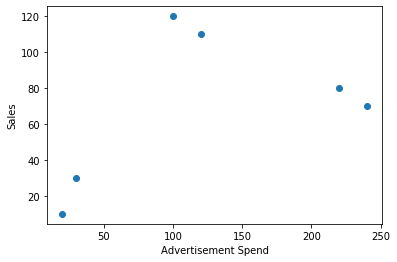

In [3]:
# 特等量とターゲットを可視化
plt.scatter(x,y, marker='o')
plt.xlabel("Advertisement Spend")
plt.ylabel("Sales")
plt.show()

In [4]:
# ステージ1 推測値（yの平均）
y_mean = y.mean()
y_mean = np.full((6,1),y_mean)
M1_pred = y_mean.copy()
M1_pred

array([[70.],
       [70.],
       [70.],
       [70.],
       [70.],
       [70.]])

In [5]:
# ステージ1 残差（実際の値 - 推測値）
error_1 = y.reshape(6,1) - y_mean
error_1

array([[-60.],
       [-40.],
       [ 50.],
       [ 40.],
       [ 10.],
       [  0.]])

In [6]:
# ステージ1の確認
table = pd.DataFrame({
    '広告費':x[:,0],
    '売上': y[:,0],
    'M1推測': M1_pred[:,0],
    'M1残差': error_1[:,0]},
    index=["A","B","C","D","E","F"]
)
# テーブル表示
table[['広告費', '売上', 'M1推測', 'M1残差']]

,広告費,売上,M1推測,M1残差
A,20.0,10.0,70.0,-60.0
B,30.0,30.0,70.0,-40.0
C,100.0,120.0,70.0,50.0
D,120.0,110.0,70.0,40.0
E,220.0,80.0,70.0,10.0
F,240.0,70.0,70.0,0.0


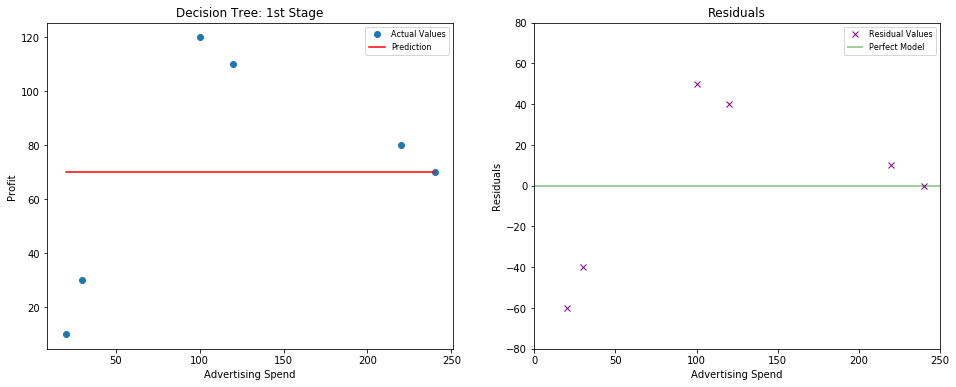

In [9]:
# ステージ1の結果を可視化
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# 予測のプロット
ax1.plot(x, y, 'o', label='Actual Values')
ax1.plot(x, M1_pred, 'r', label='Prediction')
ax1.set_title('Decision Tree: 1st Stage')
ax1.set_xlabel('Advertising Spend')
ax1.set_ylabel('Profit')
ax1.legend(fontsize=8)

# 誤差のプロット
ax2.plot(x, error_1, 'x', color='purple',label='Residual Values')
ax2.set_xlim(0,250)
ax2.set_ylim(-80,80)
ax2.hlines(y=0, xmin=0, xmax=300, color='g', alpha=0.5, label='Perfect Model')
ax2.set_title('Residuals')
ax2.set_xlabel('Advertising Spend')
ax2.set_ylabel('Residuals')
ax2.legend(fontsize=8)

In [10]:
# ステージ2のモデル構築（M_2）
M2 = DecisionTreeRegressor(max_depth=1)
M2 = M2.fit(x, error_1)
M2_output = M2.predict(x)

In [11]:
# ステージ2の推測値
M2_pred = M1_pred + M2_output.reshape(6, 1)
M2_pred

array([[20.],
       [20.],
       [95.],
       [95.],
       [95.],
       [95.]])

In [12]:
# ステージ2の残差を計算
error_2 = y.reshape(6, 1) - M2_pred
error_2

array([[-10.],
       [ 10.],
       [ 25.],
       [ 15.],
       [-15.],
       [-25.]])

In [13]:
# ステージ2の確認
stage_2 = pd.DataFrame({
    'M2出力': M2_output.reshape(6, 1)[:,0],
    'M2推測': M2_pred.reshape(6, 1)[:,0],
    'M2残差': error_2[:,0]},
    index=["A","B","C","D","E","F"]
)
stage_2 = pd.concat([table, stage_2], axis=1)
# テーブル表示
stage_2[['広告費', '売上', 'M1推測', 'M1残差', 'M2出力', 'M2推測', 'M2残差']]

,広告費,売上,M1推測,M1残差,M2出力,M2推測,M2残差
A,20.0,10.0,70.0,-60.0,-50.0,20.0,-10.0
B,30.0,30.0,70.0,-40.0,-50.0,20.0,10.0
C,100.0,120.0,70.0,50.0,25.0,95.0,25.0
D,120.0,110.0,70.0,40.0,25.0,95.0,15.0
E,220.0,80.0,70.0,10.0,25.0,95.0,-15.0
F,240.0,70.0,70.0,0.0,25.0,95.0,-25.0


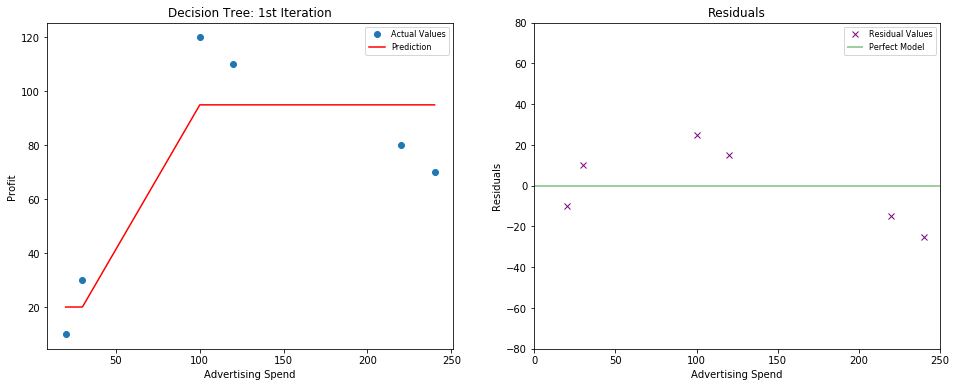

In [15]:
# ステージ2の結果を可視化
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# 予測のプロット
ax1.plot(x, y, 'o', label='Actual Values')
ax1.plot(x, M2_pred, 'r', label='Prediction')
ax1.set_title('Decision Tree: 1st Iteration')
ax1.set_xlabel('Advertising Spend')
ax1.set_ylabel('Profit')
ax1.legend(fontsize=8)

# 誤差のプロット
ax2.plot(x, error_2, 'x', color='purple',label='Residual Values')
ax2.set_xlim(0,250)
ax2.set_ylim(-80,80)
ax2.hlines(y=0, xmin=0, xmax=300, color='g', alpha=0.5, label='Perfect Model')
ax2.set_title('Residuals')
ax2.set_xlabel('Advertising Spend')
ax2.set_ylabel('Residuals')
ax2.legend(fontsize=8)

In [16]:
# 特徴量を水増し（6つから300個へ）
x_mock = np.linspace(0,299,300)
x_mock = x_mock.reshape(300, 1)

# X_mockで予測
M2_output_mock = M2.predict(x_mock)
M1_pred_mock = y.mean()
M1_pred_mock = np.full((300,1),M1_pred_mock)
M2_pred_mock = M1_pred_mock + M2_output_mock.reshape(300,1)

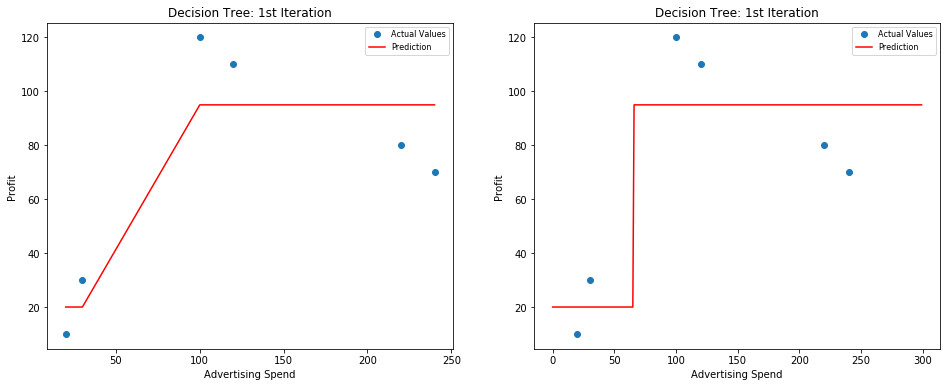

In [17]:
# ステージ2の結果を可視化
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# 実際のデータでモデルを可視化
ax1.plot(x, y, 'o', label='Actual Values')
ax1.plot(x, M2_pred, 'r', label='Prediction')
ax1.set_title('Decision Tree: 1st Iteration')
ax1.set_xlabel('Advertising Spend')
ax1.set_ylabel('Profit')
ax1.legend(fontsize=8)

# 水増しデータでモデルを可視化
ax2.plot(x, y, 'o', label='Actual Values')
ax2.plot(x_mock, M2_pred_mock, 'r', label='Prediction')
ax2.set_title('Decision Tree: 1st Iteration')
ax2.set_xlabel('Advertising Spend')
ax2.set_ylabel('Profit')
ax2.legend(fontsize=8)

In [18]:
# ステージ3のモデル構築（M_3）
M3 = DecisionTreeRegressor(max_depth=1)
M3 = M3.fit(x, error_2)
M3_output = M3.predict(x)

In [19]:
# ステージ3の推測値
M3_pred = M2_pred + M3_output.reshape(6, 1)

# ステージ3の残差を計算
error_3 = y.reshape(6, 1) - M3_pred

In [20]:
# ステージ3の確認
stage_3 = pd.DataFrame({
    'M3出力': M3_output.reshape(6, 1)[:,0],
    'M3推測': M3_pred.reshape(6, 1)[:,0],
    'M3残差': error_3[:,0]},
    index=["A","B","C","D","E","F"]
)
stage_3 = pd.concat([stage_2, stage_3], axis=1)
# テーブル表示
stage_3[['広告費', '売上', 'M1推測', 'M1残差', 'M2出力', 'M2推測', 'M2残差', 'M3出力', 'M3推測', 'M3残差']]

,広告費,売上,M1推測,M1残差,M2出力,M2推測,M2残差,M3出力,M3推測,M3残差
A,20.0,10.0,70.0,-60.0,-50.0,20.0,-10.0,10.0,30.0,-20.0
B,30.0,30.0,70.0,-40.0,-50.0,20.0,10.0,10.0,30.0,0.0
C,100.0,120.0,70.0,50.0,25.0,95.0,25.0,10.0,105.0,15.0
D,120.0,110.0,70.0,40.0,25.0,95.0,15.0,10.0,105.0,5.0
E,220.0,80.0,70.0,10.0,25.0,95.0,-15.0,-20.0,75.0,5.0
F,240.0,70.0,70.0,0.0,25.0,95.0,-25.0,-20.0,75.0,-5.0


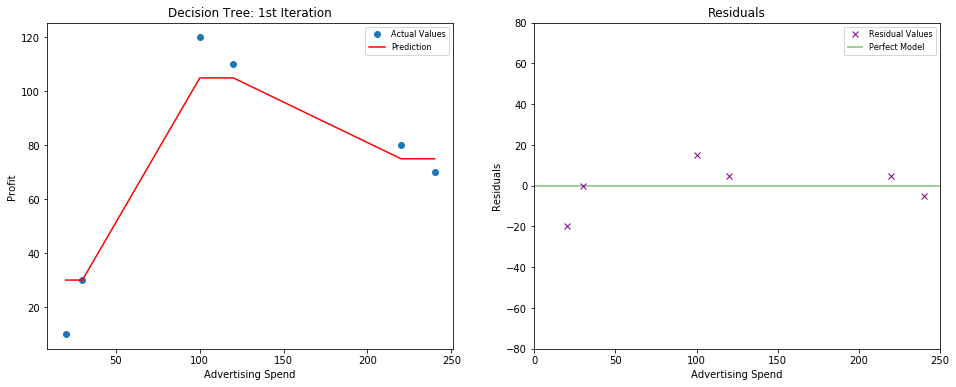

In [22]:
# ステージ3の結果を可視化
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# 予測のプロット
ax1.plot(x, y, 'o', label='Actual Values')
ax1.plot(x, M3_pred, 'r', label='Prediction')
ax1.set_title('Decision Tree: 1st Iteration')
ax1.set_xlabel('Advertising Spend')
ax1.set_ylabel('Profit')
ax1.legend(fontsize=8)

# 誤差のプロット
ax2.plot(x, error_3, 'x', color='purple',label='Residual Values')
ax2.set_xlim(0,250)
ax2.set_ylim(-80,80)
ax2.hlines(y=0, xmin=0, xmax=300, color='g', alpha=0.5, label='Perfect Model')
ax2.set_title('Residuals')
ax2.set_xlabel('Advertising Spend')
ax2.set_ylabel('Residuals')
ax2.legend(fontsize=8)

In [23]:
#ステージ3 X_mockで予測
M3_output_mock = M3.predict(x_mock)
M3_pred_mock = M2_pred_mock + M3_output_mock.reshape(300,1)

Text(0, 0.5, 'Profit')

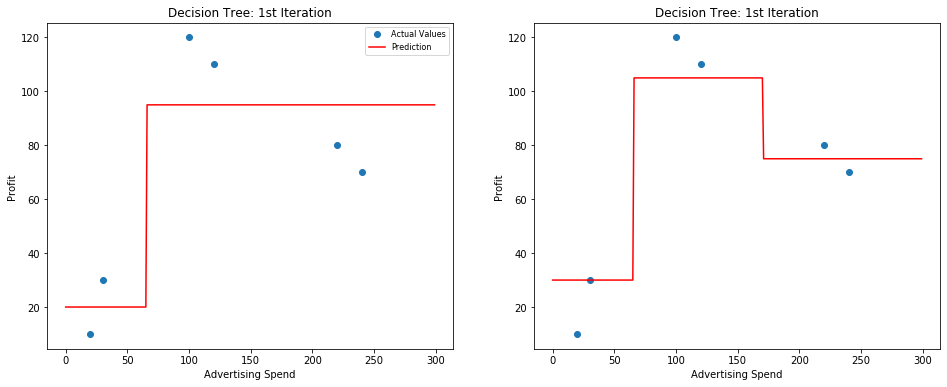

In [24]:
# ステージ３の結果を可視化
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# ステージ2 モデル
ax1.plot(x, y, 'o', label='Actual Values')
ax1.plot(x_mock, M2_pred_mock, 'r', label='Prediction')
ax1.set_title('Decision Tree: 1st Iteration')
ax1.set_xlabel('Advertising Spend')
ax1.set_ylabel('Profit')
ax1.legend(fontsize=8)

# ステージ3 モデル
ax2.plot(x, y, 'o', label='Actual Values')
ax2.plot(x_mock, M3_pred_mock, 'r', label='Prediction')
ax2.set_title('Decision Tree: 1st Iteration')
ax2.set_xlabel('Advertising Spend')
ax2.set_ylabel('Profit')

In [25]:
# ステージ4のモデル構築（M_4）
M4 = DecisionTreeRegressor(max_depth=1)
M4 = M4.fit(x, error_3)
M4_output = M4.predict(x)

In [26]:
# ステージ4の推測値
M4_pred = M3_pred + M4_output.reshape(6, 1)

# ステージ3の残差を計算
error_4 = y.reshape(6, 1) - M4_pred

In [27]:
# ステージ4の確認
stage_4 = pd.DataFrame({
    'M4出力': M4_output.reshape(6, 1)[:,0],
    'M4推測': M4_pred.reshape(6, 1)[:,0],
    'M4残差': error_4[:,0]},
    index=["A","B","C","D","E","F"]
)
stage_4 = pd.concat([stage_3, stage_4], axis=1)
# テーブル表示
stage_4[['広告費', '売上', 'M1推測', 'M1残差', 'M2出力', 'M2推測', 'M2残差',
         'M3出力', 'M3推測', 'M3残差', 'M4出力', 'M4推測', 'M4残差']]

,広告費,売上,M1推測,M1残差,M2出力,M2推測,M2残差,M3出力,M3推測,M3残差,M4出力,M4推測,M4残差
A,20.0,10.0,70.0,-60.0,-50.0,20.0,-10.0,10.0,30.0,-20.0,-20.0,10.0,0.0
B,30.0,30.0,70.0,-40.0,-50.0,20.0,10.0,10.0,30.0,0.0,4.0,34.0,-4.0
C,100.0,120.0,70.0,50.0,25.0,95.0,25.0,10.0,105.0,15.0,4.0,109.0,11.0
D,120.0,110.0,70.0,40.0,25.0,95.0,15.0,10.0,105.0,5.0,4.0,109.0,1.0
E,220.0,80.0,70.0,10.0,25.0,95.0,-15.0,-20.0,75.0,5.0,4.0,79.0,1.0
F,240.0,70.0,70.0,0.0,25.0,95.0,-25.0,-20.0,75.0,-5.0,4.0,79.0,-9.0


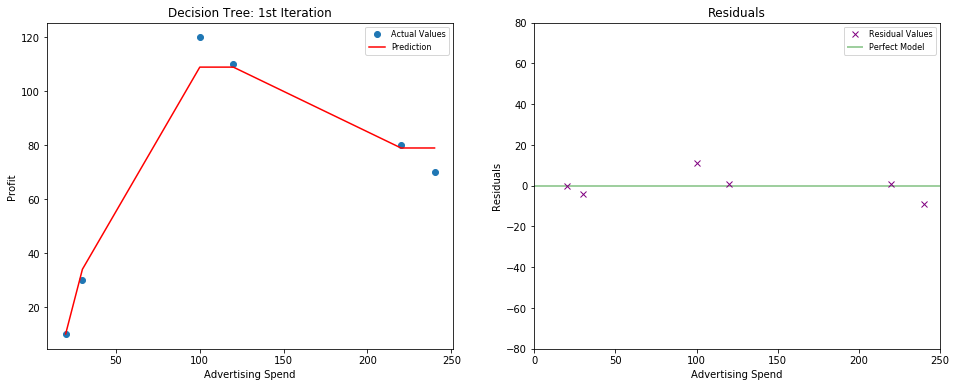

In [28]:
# ステージ4の結果を可視化
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# 予測のプロット
ax1.plot(x, y, 'o', label='Actual Values')
ax1.plot(x, M4_pred, 'r', label='Prediction')
ax1.set_title('Decision Tree: 1st Iteration')
ax1.set_xlabel('Advertising Spend')
ax1.set_ylabel('Profit')
ax1.legend(fontsize=8)

# 誤差のプロット
ax2.plot(x, error_4, 'x', color='purple',label='Residual Values')
ax2.set_xlim(0,250)
ax2.set_ylim(-80,80)
ax2.hlines(y=0, xmin=0, xmax=300, color='g', alpha=0.5, label='Perfect Model')
ax2.set_title('Residuals')
ax2.set_xlabel('Advertising Spend')
ax2.set_ylabel('Residuals')
ax2.legend(fontsize=8)

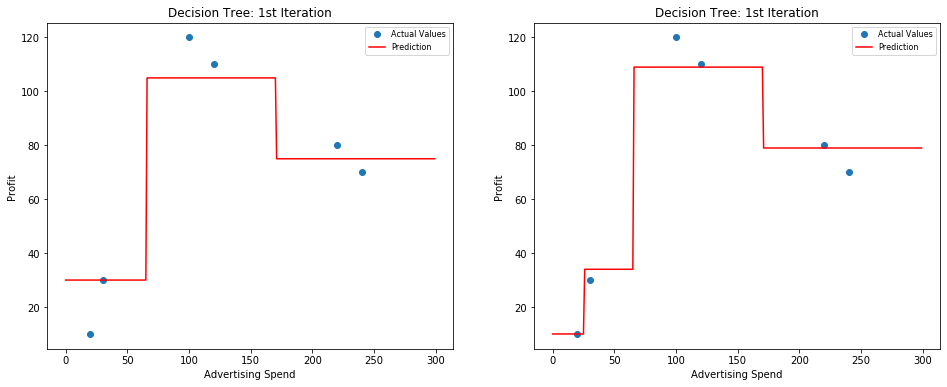

In [29]:
# ステージ3 X_mockで予測
M4_output_mock = M4.predict(x_mock)
M4_pred_mock = M3_pred_mock + M4_output_mock.reshape(300,1)

# ステージ4の結果を可視化
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# ステージ3 モデル
ax1.plot(x, y, 'o', label='Actual Values')
ax1.plot(x_mock, M3_pred_mock, 'r', label='Prediction')
ax1.set_title('Decision Tree: 1st Iteration')
ax1.set_xlabel('Advertising Spend')
ax1.set_ylabel('Profit')
ax1.legend(fontsize=8)

# ステージ4 モデル
ax2.plot(x, y, 'o', label='Actual Values')
ax2.plot(x_mock, M4_pred_mock, 'r', label='Prediction')
ax2.set_title('Decision Tree: 1st Iteration')
ax2.set_xlabel('Advertising Spend')
ax2.set_ylabel('Profit')
ax2.legend(fontsize=8)

In [30]:
# 特徴量作成
x = np.arange(0,100)
x = pd.DataFrame({'x':x})

# ターゲット作成
y1 = np.random.uniform(0,9,20)
y2 = np.random.uniform(20,22,20)
y3 = np.random.uniform(16,19,20)
y4 = np.random.uniform(5,17,20)
y5 = np.random.uniform(11,18,20)
y = np.concatenate((y1,y2,y3,y4,y5))
y = y[:,None]

# サイズを確認
y.shape, x.shape

((100, 1), (100, 1))

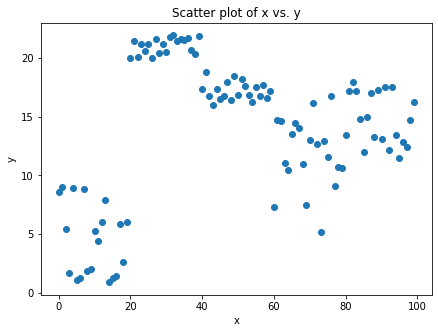

In [31]:
# 散布図の作成
plt.figure(figsize=(7,5))
plt.plot(x,y, 'o')
plt.title("Scatter plot of x vs. y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

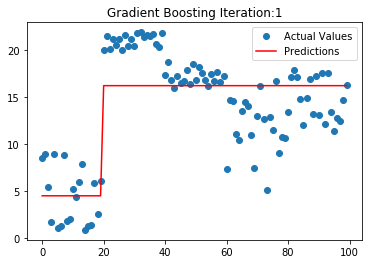

MSE: 13.659219762205979


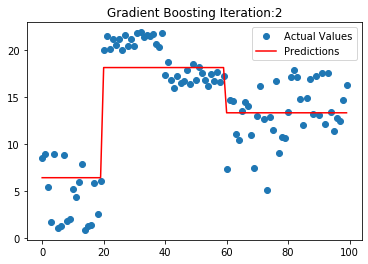

MSE: 8.093660494226352


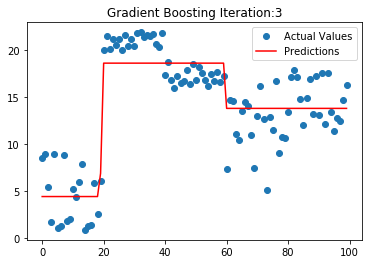

MSE: 7.149442771797294


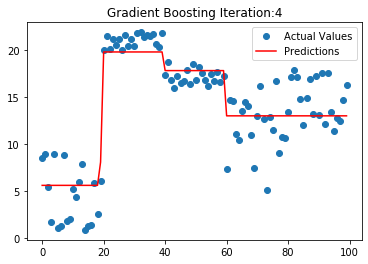

MSE: 6.203992210284253


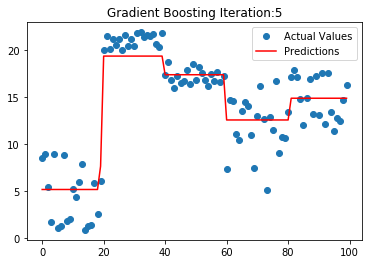

MSE: 5.380337258412117


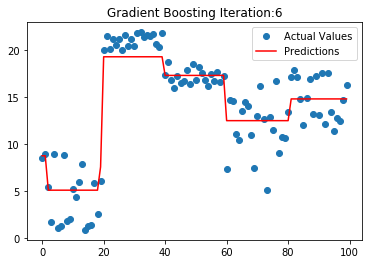

MSE: 5.117504640860554


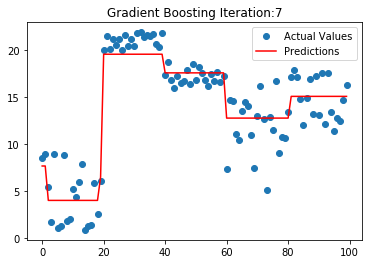

MSE: 4.8215514714776155


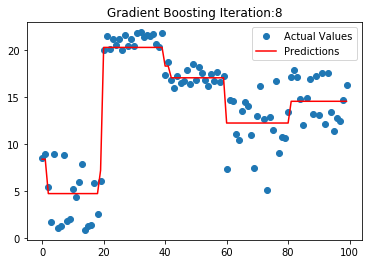

MSE: 4.441468291362728


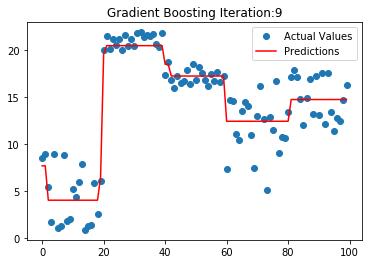

MSE: 4.309615039964665


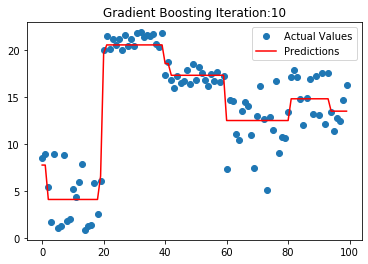

MSE: 4.2118459017231284


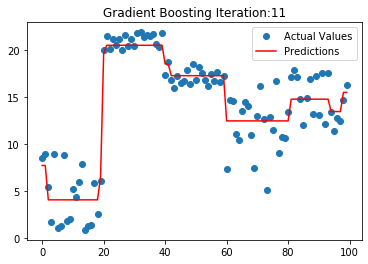

MSE: 4.130429288292086


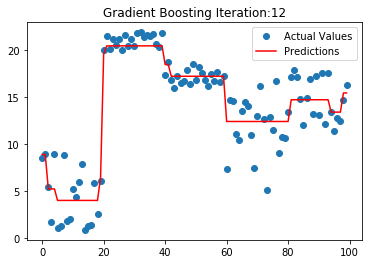

MSE: 4.059191116150894


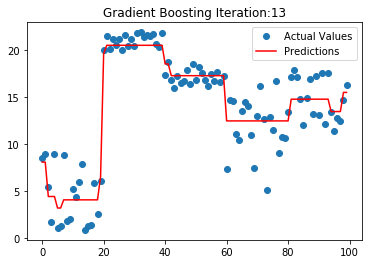

MSE: 4.009980816974688


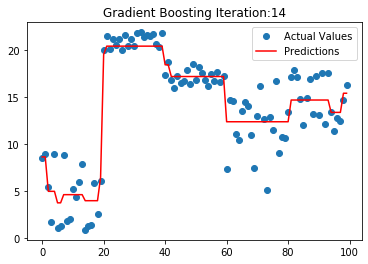

MSE: 3.9603730371726336


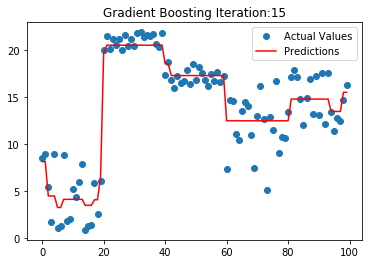

MSE: 3.909992709753305


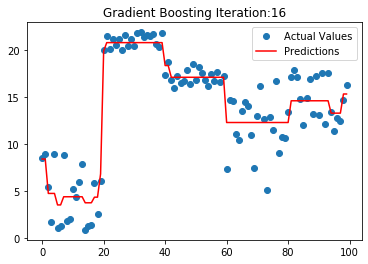

MSE: 3.860370617180715


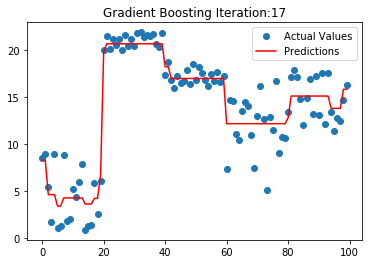

MSE: 3.7967450959135682


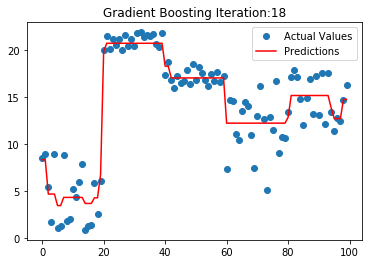

MSE: 3.7345150308082857


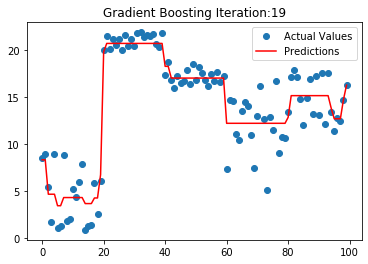

MSE: 3.7110997396535277


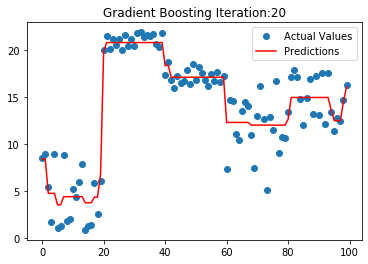

MSE: 3.6934217673265994


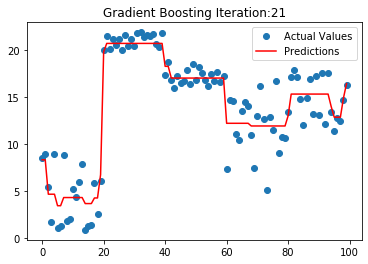

MSE: 3.6608014507259417


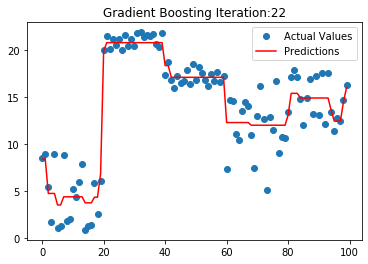

MSE: 3.62762223797655


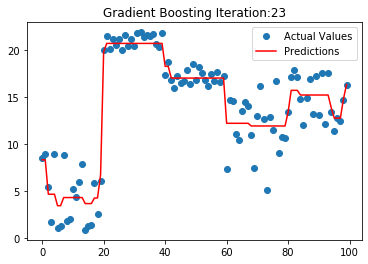

MSE: 3.6023428377865367


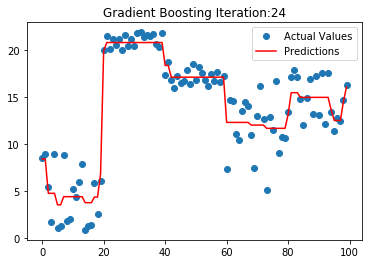

MSE: 3.5790128025689345


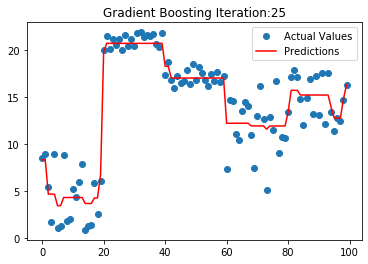

MSE: 3.5569209033237796


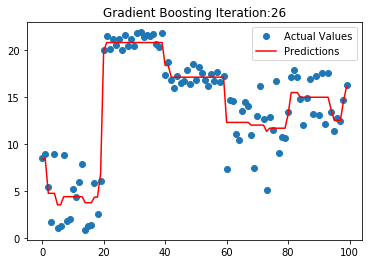

MSE: 3.5359347047415453


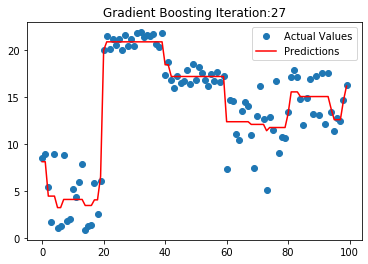

MSE: 3.514119252412123


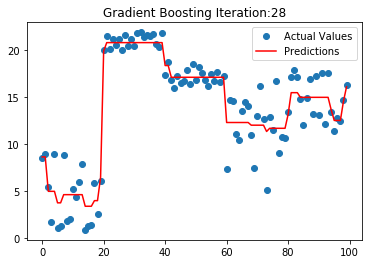

MSE: 3.471941728348384


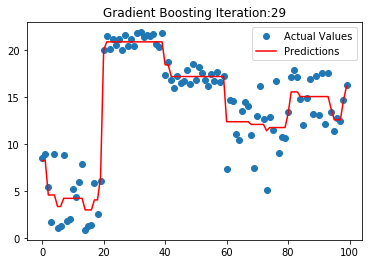

MSE: 3.440546961296391


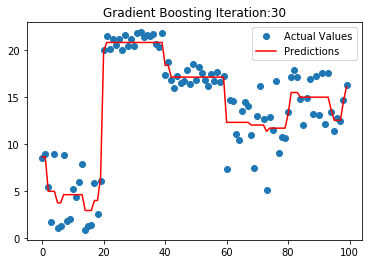

MSE: 3.4155943489062275


In [32]:
# データのサイズを取得
n = len(y)

# 推測値の初期値（全て0と設定）
y_pred_i = np.zeros(n)

for i in range(30):
    DT = DecisionTreeRegressor(max_depth=1)
    error = y.reshape(100, 1) - y_pred_i.reshape(100, 1)
    DT = DT.fit(x, error)
    y_pred_n = DT.predict(x)
    y_pred_i = y_pred_n + y_pred_i
    
    plt.plot(x, y, 'o', label='Actual Values')
    plt.plot(x, np.array(y_pred_i), 'r', label='Predictions')
    label = 'Gradient Boosting Iteration:' + str(i+1)
    plt.title(label)
    plt.legend()
    plt.show()
    print('MSE:', mean_squared_error(y, y_pred_i))